<a href="https://colab.research.google.com/github/ankur150/1st/blob/main/Facebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the data set

In [2]:
dataset = pd.read_csv('Facebook_Marketplace_data.csv')

Handling Missing Values

In [3]:
missing_values = dataset.isnull().sum()  # Checks the number of missing values per column
# Formatted table
missing_values

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [4]:
dataset = dataset.drop(columns=["Column1", "Column2", "Column3", "Column4"])  # Since there are 7050 rows in all, we can simply delete the last four columns.
dataset.info()                                                                                                                # to confirm changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


Convert 'status_published' to datetime format and extract hour published

In [5]:
dataset[dataset.columns[2]] = pd.to_datetime(dataset[dataset.columns[2]])       # Convert to datetime
dataset["hour_published"] = dataset[dataset.columns[2]].dt.hour                       # Extract hour
dataset = dataset.drop(columns=[dataset.columns[2]])                                       # Remove the column status_published
dataset[["hour_published"]].head()

,hour_published
0,6
1,22
2,6
3,2
4,3


Encoding categorical data (status_type) using Label Encoder

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["status_type"] = le.fit_transform(dataset["status_type"])
dataset.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hour_published
0,1,3,529,512,262,432,92,3,1,1,0,6
1,2,1,150,0,0,150,0,0,0,0,0,22
2,3,3,227,236,57,204,21,1,1,0,0,6
3,4,1,111,0,0,111,0,0,0,0,0,2
4,5,1,213,0,0,204,9,0,0,0,0,3


#How does the time of upload affect the number of reactions

Compute Average Reactions per Hour

In [7]:
# Group by hour and calculate mean reactions
hourly_reactions = dataset.groupby("hour_published")["num_reactions"].mean()

# Display results
hourly_reactions

,num_reactions
hour_published,
0,261.839474
1,203.315725
2,163.907618
3,290.270208
4,242.685864
5,293.870968
6,340.213198
7,183.301549
8,204.796897


Visualize the Trend

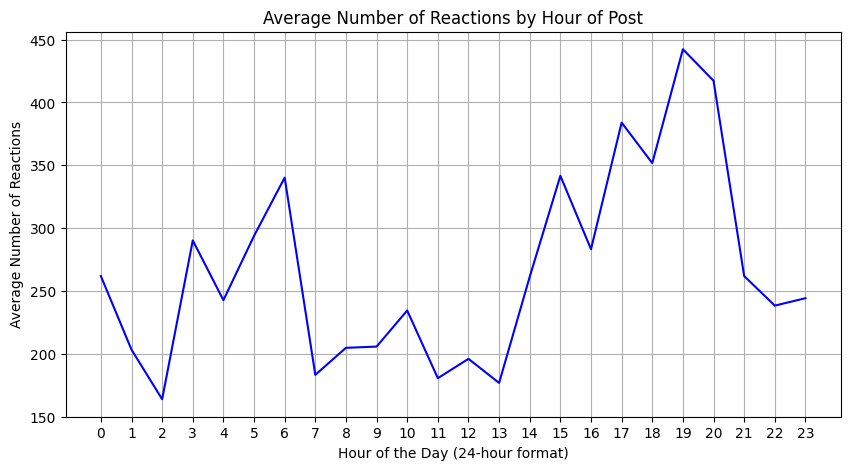

In [8]:
# Plot reactions vs. hour of the day
plt.figure(figsize=(10, 5))
plt.plot(hourly_reactions.index, hourly_reactions.values, color='b')

plt.title("Average Number of Reactions by Hour of Post")
plt.xlabel("Hour of the Day (24-hour format)")
plt.ylabel("Average Number of Reactions")
plt.xticks(range(0, 24))
plt.grid(True)

plt.show()

#Correlation between num_reactions, num_comments, and num_shares

Positive correlation (+1) → When one variable increases, the other also increases.

Negative correlation (-1) → When one variable increases, the other decreases.

No correlation (0) → No relationship between the variables.

In [9]:
# Compute correlation matrix
correlation_matrix = dataset[["num_reactions", "num_comments", "num_shares"]].corr()

# Display correlation values
correlation_matrix

,num_reactions,num_comments,num_shares
num_reactions,1.000000,0.150843,0.250723
num_comments,0.150843,1.000000,0.640637
num_shares,0.250723,0.640637,1.000000


#K-Means Clustering

Feature Scaling using Standardization

In [15]:
# Re-import StandardScaler
from sklearn.preprocessing import StandardScaler

# Identify numerical columns, excluding 'hour_published', 'status_id', and 'status_type'
numerical_columns = dataset.select_dtypes(include=['number']).columns
numerical_columns = [col for col in numerical_columns if col not in ['hour_published', 'status_id', 'status_type']]

# Apply StandardScaler only to the selected numerical columns
scaler = StandardScaler()
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

# Display the first few rows after selective scaling
dataset.head()


,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hour_published
0,1,3,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748,6
1,2,1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,22
2,3,3,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748,6
3,4,1,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,2
4,5,1,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748,3


Importing Libraries

In [16]:
from sklearn.cluster import KMeans

Splitting the dataset

In [20]:
selected_indices = [dataset.columns.get_loc(col) for col in ["status_type", "num_reactions", "num_comments", "num_shares", "num_likes","num_loves", "num_wows", "num_hahas", "num_sads", "num_angrys"]]
# Select relevant columns using iloc
dataset = dataset.iloc[:, selected_indices]
# Reduce the dataset to the first 50 rows
dataset = dataset.iloc[:50, :]

# Display the reduced dataset
dataset.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,3,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,1,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,1,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748


Elbow Method

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)

Plot Elbow Method

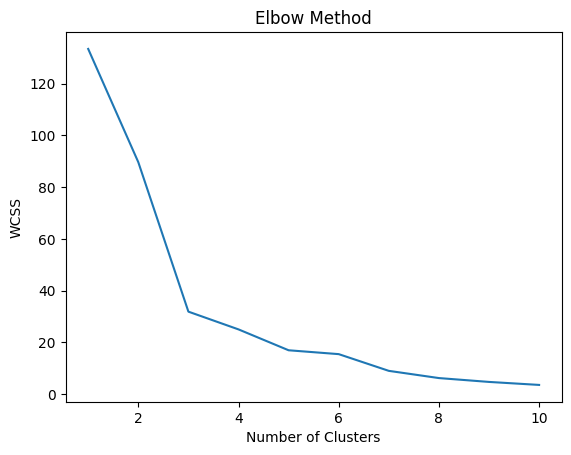

In [22]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Train K-Means Model

In [25]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(dataset)

Visualizing the clusters

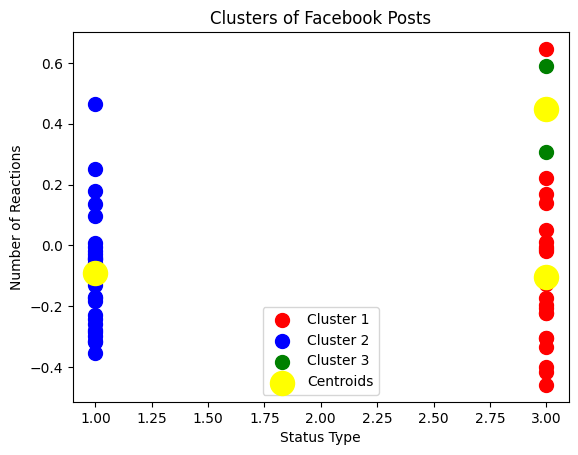

In [26]:
plt.scatter(dataset.iloc[y_kmeans == 0, 0], dataset.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(dataset.iloc[y_kmeans == 1, 0], dataset.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(dataset.iloc[y_kmeans == 2, 0], dataset.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Facebook Posts')
plt.xlabel('Status Type')
plt.ylabel('Number of Reactions')
plt.legend()
plt.show()

#Count of different types of posts in the dataset

In [27]:
dataset = pd.read_csv('Facebook_Marketplace_data.csv')
# Count unique values in the 'status_type' column
post_counts = dataset["status_type"].value_counts()

# Display the count of each post type
post_counts

,count
status_type,
photo,4288
video,2334
status,365
link,63


#Average value of num_reaction, num_comments, num_shares for each post type

In [28]:
# Calculate the mean for each post type
avg_values = dataset.groupby("status_type")[["num_reactions", "num_comments", "num_shares"]].mean()

# Display the result
avg_values

,num_reactions,num_comments,num_shares
status_type,,,
link,370.142857,5.698413,4.396825
photo,181.290345,15.993470,2.553871
status,438.783562,36.238356,2.558904
video,283.409597,642.478149,115.679949
